<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_Kaggle/blob/main/20221209_Cactus_model_save_load_torch-no_grad_list-extend_append.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 항공 사진 내 선인장 식별
 - 미션 : 항공사진내 선인장이 있을 확률 예측
 - 유형 : 이진분류
 - 평가지표 : ROC AUC
 - 사용모델 : 기본 CNN

In [4]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/kaggle/input/Aerial-Cactus-Identification/'

labels = pd.read_csv(data_path + 'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [5]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [6]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


### 데이터 시각화
 - 훈련데이터에 선인장이 있고(1), 없고(0) 비율 및 편차 확인

#### 타깃값 분포

In [7]:
import matplotlib.pyplot as plt
import os
print(os.getcwd()) # /content
os.chdir('/content/drive/MyDrive/Colab Notebooks') # Colab Notebooks 폴더 넣어놓은 자체제작 MatplotlibKor 라이브러리 사용하기 위함
from MatplotlibToKor import * # 
print(os.getcwd()) # /content/drive/MyDrive/Colab Notebooks

/content
/content/drive/MyDrive/Colab Notebooks


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


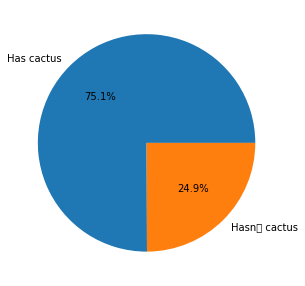

In [8]:
plt.figure(figsize=(5, 5)) # State-based
label = ['Has cactus', 'Hasn\t cactus'] # 타깃값 레이블
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%'); # Series.value_counts() : idx에 unique값, value에 각 unique의 개수

#### 이미지 출력
 - zipfile 모듈의 Zipfile 클래스 

In [9]:
# 최초 한번만 실행하고 주석 처리(이미 압축푼 파일이 있으므로)
# from zipfile import ZipFile

# # 훈련 이미지 데이터 압축 풀기
# with ZipFile(data_path + 'train.zip') as zipper:
#     zipper.extractall()

# # 테스트 이미지 데이터 압축 풀기
# with ZipFile(data_path + 'test.zip') as zipper:
#     zipper.extractall()

In [10]:
import os

num_train = len(os.listdir('train/'))
num_test = len(os.listdir('test/'))

print(f'훈련 데이터 개수: {num_train}')
print(f'테스트 데이터 개수: {num_test}')

훈련 데이터 개수: 17500
테스트 데이터 개수: 4000


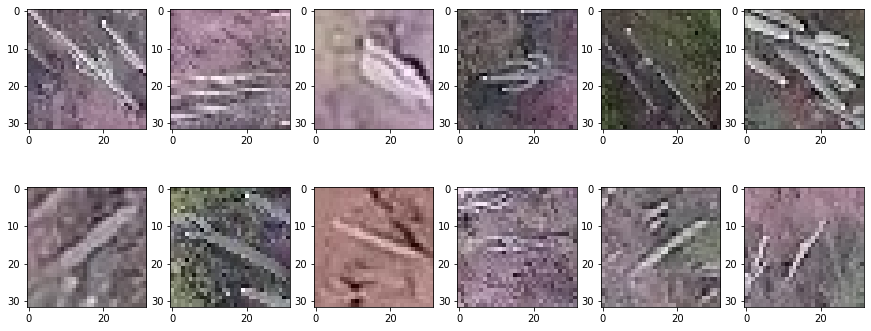

In [11]:
import matplotlib.gridspec as gridspec
import cv2 # 이미지 파일을 읽기 위해

plt.figure(figsize=(15, 6)) # State-based
grid = gridspec.GridSpec(2, 6) # 그리드스펙 객체 생성

# 선인장을 포함하는 이미지 파일명 마지막 12개
last_has_cactus_img_name = labels[labels['has_cactus'] == 1]['id'][-12:]
# last_has_cactus_img_name = labels.loc[labels['has_cactus'] == 1, 'id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = 'train/' + img_name # 이미지 파일 경로
    image = cv2.imread(img_path)   # 이미지 파일 읽기(cv2는 BGR형식)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 채널 보정(BGR → RGB)
    ax = plt.subplot(grid[idx]) # State-based로 시작해서 Object-oriented 방식으로 변경
    # ax = fig.add_subplot()    # fig = plt.figure() 했다면 이런식으로 축 추가
    ax.imshow(image) # for문 돌면서 축을 하나씩 출력(plt.imshow()가 아님 주의)

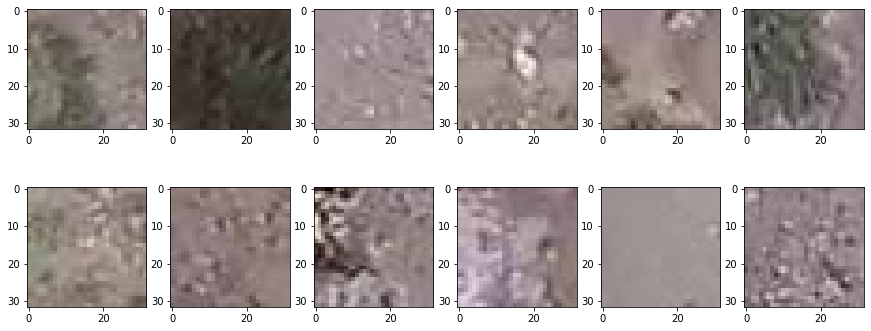

In [12]:
import matplotlib.gridspec as gridspec
import cv2 # 이미지 파일을 읽기 위해

plt.figure(figsize=(15, 6)) # State-based
grid = gridspec.GridSpec(2, 6) # 그리드스펙 객체 생성

# 선인장을 포함하지 않는 이미지 파일명 마지막 12개
last_hasnt_cactus_img_name = labels[labels['has_cactus'] == 0]['id'][-12:]
# last_hasnt_cactus_img_name = labels.loc[labels['has_cactus'] == 0, 'id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    img_path = 'train/' + img_name # 이미지 파일 경로
    image = cv2.imread(img_path)   # 이미지 파일 읽기(cv2는 BGR형식)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 채널 보정(BGR → RGB)
    ax = plt.subplot(grid[idx]) # State-based로 시작해서 Object-oriented 방식으로 변경
    # ax = fig.add_subplot()    # fig = plt.figure() 했다면 이런식으로 축 추가
    ax.imshow(image) # for문 돌면서 축을 하나씩 출력(plt.imshow()가 아님 주의)

In [13]:
image.shape

(32, 32, 3)

 - 32x32 의 낮은 해상도의 컬러(3채널) 이미지

### 시드값 고정 및 GPU 장비 설정
 - 다시 실행해도 같은 결과를 얻기 위함
 - 머신러닝 훈련시 random_state와 같은 역할

In [14]:
# 아래 임포트한 패키지 및 seed 함수를 라이브러리로 저장(SeedFix폴더의 seedfix파일의 seed함수)
import torch
import random
import numpy as np
import os

# 시드값 고정
def seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)               # 파이썬 난수 생성기 시드 고정
    np.random.seed(seed)            # 넘파이 난수 생성기 시드 고정
    torch.manual_seed(seed)         # 파이토치 난수 생성기 시드 고정(CPU 사용 시)
    torch.cuda.manual_seed(seed)    # 파이토치 난수 생성기 시드 고정(GPU 사용 시)
    torch.cuda.manual_seed_all(seed)# 파이토치 난수 생성기 시드 고정(멀티GPU 사용 시)
    torch.backends.cudnn.deterministic = True # 확정적 연산 사용
    torch.backends.cudnn.benchmark = False    # 벤치마크 기능 해제
    torch.backends.cudnn.enabled = False      # cudnn 사용 해제

In [15]:
from SeedFix.seedfix import seed
seed()

#### GPU 장비 설정

In [16]:
# 조건문 
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [17]:
# 한줄 조건문
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 코랩 환경 설정이 되어있는상태여야함

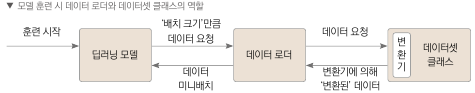

#### 훈련 데이터, 검증 데이터 분리


In [18]:
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터 분리
train, valid = train_test_split(labels,
                                test_size=0.1,                  # 훈련데이터90%, 검증데이터10%
                                stratify=labels['has_cactus'],  # 동일한 타깃값 비율을 갖도록 split 
                                random_state=50)

In [19]:
print('훈련 데이터 개수 :', len(train))
print('검증 데이터 개수 :', len(valid))

훈련 데이터 개수 : 15750
검증 데이터 개수 : 1750


#### 데이터셋 클래스 정의
 - 파이토치로 신경망 모델을 구축하기 위함

In [20]:
import cv2
from torch.utils.data import Dataset # 추상클래스(를 상속받아 특수메서드 오버라이딩)

class ImageDataset(Dataset):
    # 초기화 메서드(생성자)
    def __init__(self, df, img_dir='./', transform=None):
        super().__init__()  # 부모(추상)클래스인 Dataset의 생성자 호출

        # 전달받은 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
    
    # 데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.df)
    
    # 인덱스(idx)에 해당하는 데이터 및 레이블 반환 메서드
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0]    # 이미지 ID
        img_path = self.img_dir + img_id # 이미지 파일경로
        image = cv2.imread(img_path)     # 이미지 파일읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상보정
        label = self.df.iloc[idx, 1]     # 이미지 레이블(타깃값)

        if self.transform is not None:
            image = self.transform(image) # 이미지 변환기가 있다면 적용
        return image, label

#### 데이터셋 생성
 - 파이토치 모델로 이미지를 다루려면 이미지 데이터를 텐서 타입으로 변환필요

In [21]:
from torchvision import transforms # 이미지 변환 모듈
transform = transforms.ToTensor()
# cv2.imread()로 읽어온 이미지(가로X세로X채널) → 파이토치에서 사용하기 위한 이미지(채널X가로X세로)

In [22]:
dataset_train = ImageDataset(df=train, img_dir='train/', transform=transform)
dataset_valid = ImageDataset(df=valid, img_dir='train/', transform=transform)

#### 파이썬의 특징인 일급객체 이해하기
 - 1. 함수를 변수에 담아서 변수()로 사용할 수 있다.
 - 2. 함수1을 함수2의 파라미터에 넣을 수 있다(괄호 없이 사용)
 - 3. 함수1을 함수2의 리턴값으로 사용할수 있다(괄호 포함 사용)


#### 괄호 없이 함수를 사용하는 경우 이해하기
  - 1. 함수 뒤에 붙는 괄호는 그 함수를 호출하겠다는 뜻
  - 2. 함수는 정의를 한다고 해서 바로 실행되는 것이 아니다. 정의 후에 꼭 불러주는 작업이 있어야 실행됨
  - 3. 함수도 하나의 객체이며, 만약 괄호 없이 사용했다면 그저 함수 객체 그 자체로 넘겼다는 뜻

[링크 텍스트](https://blog.naver.com/qkdqkd1122/222880930740)

  - 4. 사용 예제

    ```
def str_length(s):
        return len(s)
max('a', 'abc', 'ab', key=str_length)
# str_length('a') → 1
# str_length('abc') → 3
# str_length('ab') → 2
# max(1, 3, 2) → 3 즉, 'abc'가 return됨
    ```
    ```
# str_length함수가 즉시 실행되는 것이 아니라,
# max함수 내부에서 순서대로 호출되면서,
# 중간결과 값을 저장하며, max함수의 인자로 사용됨
    ```

 [링크 텍스트](https://hashcode.co.kr/questions/7489/python%EC%97%90%EC%84%9C-%EC%96%B8%EC%A0%9C-%EA%B4%84%ED%98%B8%EB%A5%BC-%EC%8D%A8%EC%95%BC-%ED%95%98%EB%82%98%EC%9A%94)

#### 데이터 로더 생성
 - 데이터셋 생성 → 데이터 로더 생성
 - 지정한 배치크기만큼 데이터를 불러오는 객체

In [23]:
from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True) # 한번호출시 32개의 이미지를 불러옴
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

In [24]:
from SeedFix.seedfix import *
# seed(), seed_work(), g 변수 모두 호출됨

#### 전역변수와 지역변수
 - 1. 지역변수는 전역변수로 나오지 못한다

    ```
    a = 10
    def test(b, c):
        a = b + c
        return a

    print(a) # 10 : 함수내에서 정의된 지역변수 a는 전역으로 나오지 못한다.
    ```


 - 2. 전역변수를 지역변수로 가져와서 수정가능하며, 전역변수에 영향을 준다

    ```
    a = 10
    def test(b, c):
        global a    # 전역변수를 지역변수로 가져옴
        a = b + c
        return a
        
    print(test(1, 2)) # 3 : 전역변수 a를 지역변수로 가져와서 수정하면 전역에 영향을 준다.
    ```

### 모델 생성
 - 기본적인 합성곱 신경망(CNN) 모델
 - 데이터셋(클래스) 정의/생성 → 데이터로더 생성 → 모델(클래스) 정의/생성 → 손실함수,옵티마이저 설정 → 모델 훈련

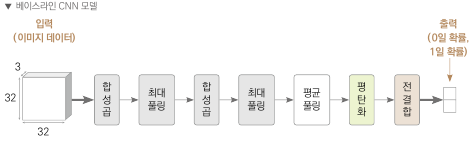

In [25]:
import torch.nn as nn # 신경망 모듈
import torch.nn.functional as F # 신경망 모듈에서 자주사용되는 함수를 모아둔 모듈

In [26]:
class Model(nn.Module): # 신경망 모듈(추상클래스)를 상속받음 : __init__(), forward() 두가지 오버라이딩 해야함
    # 신경망 계층 정의
    def __init__(self): # Model()클래스로 인스턴스 객체생성시 파라미터를 아무것도 받지 않음
        super().__init__() # 상속받은 nn.Module의 __init__() 메서드 호출
    
        # 첫번째 합성곱 계층
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2)

        # 두번째 합성곱 계층
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2)

        # 최대 풀링 계층
        self.max_pool = nn.MaxPool2d(kernel_size=2)

        # 평균 풀링 계층
        self.avg_pool = nn.AvgPool2d(kernel_size=2)

        # 전결합(fc) 계층(layer)
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)
        # 최종 channel은 CNN Layer정의하면서 정해놓은 값(64), 최종 가로세로 크기는 정의한 Layer로 계산해본 값(4)
    
    # 순전파 출력 정의 : 출력값 얻기위해 인스턴스.forward()로 직접 호출하는 것은 아님
    ## nn.Module 추상클래스의 내부적 로직에 의해 입력값을 받게 되면 forward 메서드가 동작함
    def forward(self, x):   # 상속받은 nn.Module의 forward() 메서드를 재정의함 
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.max_pool(F.relu(self.conv2(x)))
        x = self.avg_pool(x)
        x = x.view(-1, 64 * 4 * 4) # -1 : 이후 배치사이즈를 조절할경우 자유롭게 대응하기 위함
        x = self.fc(x)
        return x    # (배치사이즈, 2)

In [27]:
model = Model().to(device)

#### Model 클래스를 정의하는 또 다른 방법



```
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        # 첫번째 Layer
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=32,    # nn.Sequential()로 합성곱연산,활성화함수,최대풀링을 합쳐서 사용
                                              kernel_size=3, padding=2),
                                    nn.ReLU(),                      # nn.functional.relu() vs nn.ReLU()
                                    nn.MaxPool2d(kernel_size=2))
        # 두번째 Layer
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=32,out_channels=64,    # nn.Sequential()로 합성곱연산,활성화함수,최대풀링을 합쳐서 사용
                                              kernel_size=3, padding=2),
                                    nn.ReLU(),                      # nn.functional.relu() vs nn.ReLU()
                                    nn.MaxPool2d(kernel_size=2))
        # 평균 풀링 계층
        self.avg_pool = nn.AvgPool2d(kernel_size=2)
        # 전결합 계층
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)
    # 순전파 출력 정의
    def forward(self, x):   # nn.sequential로 레이어에 많은 기능을 담아서 forward는 비교적 간단
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.avg_pool(x)
        x = x.view(-1, 64 * 4 * 4)
        x = self.fc(x)
        return x
```



#### 클래스의 인스턴스를 생성하고 이후 인스턴스에 파라미터를 입력시 로직
 - Model(nn.Module)클래스로 model 인스턴스 생성하고
 - output = model(input)시 내부적으로 forward(self, x)메서드가 수행되는 로직
 - 1. def $__call__$/(self): 매직메서드 정의
 - 2. $__call__$ = forward

 [링크 텍스트](https://ddiri01.tistory.com/374)



```
class test():
    def __init__(self, a=1):  # __init__() should return None, not 'int' 
        self.t = a
    
    # 인스턴스가 호출 가능하도록 하는 매직메서드
    def __call__(self):  # t = test() 인스턴스 정의 후 t() 등으로 호출하려면 __call__() 정의되야함
        print('call됨')

    def forward(self, b):
        return self.t + b
    
    # 인스턴스가 호출시 함수를 실행 시키는 기능
    __call__ = forward # 함수명

t = test()
t(10)
# 11
```



In [28]:
class test():
    def __init__(self, a=1):  # __init__() should return None, not 'int' 
        self.t = a
    
    # 인스턴스가 호출 가능하도록 하는 매직메서드
    def __call__(self):  # t = test() 인스턴스 정의 후 t() 등으로 호출하려면 __call__() 정의되야함
        print('call됨')

    def forward(self, b):
        return self.t + b
    
    # 인스턴스가 호출시 함수를 실행 시키는 기능
    __call__ = forward # 함수명

In [29]:
t = test()

In [30]:
t(10)

11

### 모델 훈련
 - 훈련에 앞서 손실함수, 옵티마이저 설정

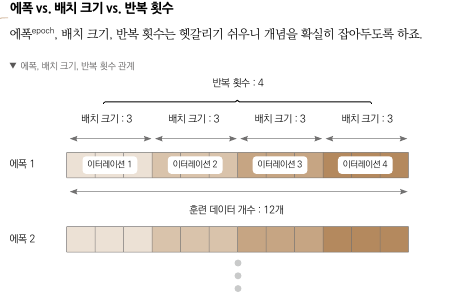

In [31]:
len(loader_train) # 데이터 로더의 길이로 반복횟수 구할 수 있음

493

#### 손실 함수 설정
 - 신경망 모델 훈련 : 가중치를 갱신
 - 가중치 갱신 : 예측값과 실제값의 손실값이 작아지는 방향으로 갱신
 - 손실값을 구하는 함수 = 손실 함수

In [32]:
# 손실 함수
criterion = nn.CrossEntropyLoss() # 교차엔트로피 : 분류 문제에 주로 사용

#### 옵티마이저 설정
 - 모델의 가중치를 입력받는다

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 배치 마다 새로운 모델의 가중치를 파라미터로 받게됨

In [34]:
%%time 
# 16min 이상 소요됨
model_save_path = '/content/drive/MyDrive/Colab Notebooks/kaggle/input/Aerial-Cactus-Identification/model_base_dict.pt'


if os.path.file(model_save_path): # 훈련후 저장한 모델이 있으면 모델 훈련X
    pass
else:

    epochs = 10 # 총 에폭
    # '총 에폭'만큼 반복
    for epoch in range(epochs):
        epoch_loss = 0 # 에폭별 손실 값 초기화

        # '반복 횟수' 만큼 반복(=이터레이션)
        for idx, (images, labels) in enumerate(loader_train): 
        # ImageDataset 정의할 때 __getitem__() 메서드의 return 값 → image, label
        # DataLoader 생성할 때 ImageDataset으로 생성한 dataset_train 객체를 파라미터로 받음
            images = images.to(device)
            labels = labels.to(device)

            # 옵티마이저 내 기울기 초기화
            optimizer.zero_grad() # model.weight.grad → None

            # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용하여 출력값 계산
            outputs = model(images) # Model(nn.Module)클래스로 생성한 인스턴스인 model에 images로 호출(__call__)
            # nn.Module 부모(추상)클래스의 __call__ 메서드를 통해 오버라이딩된 forward 메서드를 호출함

            # 손실 함수를 활용해 outputs와 labels의 손실값 계산
            loss = criterion(outputs, labels) # nn.CrossEntropy()클래스로 생성한 인스턴스인 criterion에 outputs, labels로 호출(__call__)

            # 현재 배치에서의 손실 추가
            epoch_loss += loss.item()

            # 역전파 수행
            loss.backward() # model.parameters()의 가중치의 .grad 어트리뷰트에 계산된 기울기가 저장됨
            # print(len(list(model.parameters()))) # 가중치는 총 6개

            # 가중치 갱신
            optimizer.step() # model.parameters()의 가중치의 .grad 어트리뷰트에 접근해 가중치를 갱신함
            # model.weight 또는 model.bias로 갱신된 가중치 및 편향을 확인할 수 있음
            
            # 반복당(이터레이션) 손실
            if idx % 50 == 0:
                print(f'에폭 [{epoch+1}/{epochs}], 이터레이션 [{idx+1}/{len(loader_train)}] - 손실값 : {loss:.4f}')
        # 에폭당 평균 손실값(반복당 손실의 합 / 반복횟수) 출력
        print(f'에폭 [{epoch+1}/epochs] - 손실값 : {epoch_loss/len(loader_train):.4f}')

    # 전체 에폭 훈련후 모델 저장
    torch.save(model.state_dict(), model_save_path)

에폭 [1/10], 이터레이션 [1/493] - 손실값 : 0.7389
에폭 [1/10], 이터레이션 [51/493] - 손실값 : 0.6712
에폭 [1/10], 이터레이션 [101/493] - 손실값 : 0.4591
에폭 [1/10], 이터레이션 [151/493] - 손실값 : 0.4396
에폭 [1/10], 이터레이션 [201/493] - 손실값 : 0.6247
에폭 [1/10], 이터레이션 [251/493] - 손실값 : 0.5267
에폭 [1/10], 이터레이션 [301/493] - 손실값 : 0.5917
에폭 [1/10], 이터레이션 [351/493] - 손실값 : 0.4560
에폭 [1/10], 이터레이션 [401/493] - 손실값 : 0.4379
에폭 [1/10], 이터레이션 [451/493] - 손실값 : 0.5401
에폭 [1/epochs] - 손실값 : 0.5233
에폭 [2/10], 이터레이션 [1/493] - 손실값 : 0.4146
에폭 [2/10], 이터레이션 [51/493] - 손실값 : 0.3652
에폭 [2/10], 이터레이션 [101/493] - 손실값 : 0.4277
에폭 [2/10], 이터레이션 [151/493] - 손실값 : 0.2909
에폭 [2/10], 이터레이션 [201/493] - 손실값 : 0.3468
에폭 [2/10], 이터레이션 [251/493] - 손실값 : 0.3161
에폭 [2/10], 이터레이션 [301/493] - 손실값 : 0.3493
에폭 [2/10], 이터레이션 [351/493] - 손실값 : 0.1368
에폭 [2/10], 이터레이션 [401/493] - 손실값 : 0.2704
에폭 [2/10], 이터레이션 [451/493] - 손실값 : 0.2521
에폭 [2/epochs] - 손실값 : 0.3453
에폭 [3/10], 이터레이션 [1/493] - 손실값 : 0.4280
에폭 [3/10], 이터레이션 [51/493] - 손실값 : 0.3977
에폭 [3/10], 이터레이션 [101/493] 

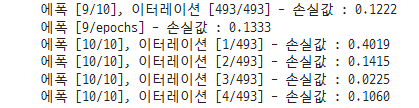

#### 모델 Save & Load 2가지 방법
 - 1. state_dict()로 모델의 파라미터만 Save → 동일한 모델 구조를 생성한 뒤 파라미터 Load
 - 2. 모델을 통째로 Save → 통째로 Load

In [107]:
model # 모델 출력시 나타나는 정보

Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc): Linear(in_features=1024, out_features=2, bias=True)
)

In [108]:
model.state_dict().keys() # 모델.sate_dict() 출력시 나타나는 각 layer 마다의 parameters(weight, bias)

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc.weight', 'fc.bias'])

In [128]:
# 모델 저장(파라미터만)
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/kaggle/input/Aerial-Cactus-Identification/model_base_dict.pt')

In [129]:
# 모델 생성
model2 = Model()

In [131]:
# 모델 로드(파라미터만)
model2.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/kaggle/input/Aerial-Cactus-Identification/model_base_dict.pt'))

<All keys matched successfully>

In [121]:
# 모델 저장(통째로)
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/kaggle/input/Aerial-Cactus-Identification/model_base_all.pt')

In [122]:
# 모델 로드(통째로)
model_new = torch.load('/content/drive/MyDrive/Colab Notebooks/kaggle/input/Aerial-Cactus-Identification/model_base_all.pt')


```
# backward() 메서드의 기능 확인 : 가중치에 .grad 어트리뷰트 값 저장
w = torch.tensor(2.0, requires_grad=True)

epochs = 5
for epoch in range(epochs):
    y = 2 * w
    y.backward() # 텐서는 backward() 메서드 사용 가능 : torch.tensor클래스에 backward()메서드 있음
    print(f'y를 w로 미분한 값(기울기) :{w.grad}')   # w.grad : 가중치의 어트리뷰트에 기울기가 저장됨
    # 기울기 초기화를 하지 않으면 반복문을 통해 w.grad가 계속 더해짐

```
[backward(), .grad, zero_grad() : 링크 텍스트](https://blog.naver.com/dbwjd516/222874331187)


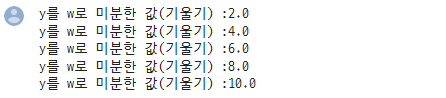

 - 다음 에폭으로 넘어갈때 수정된 가중치를 가지고 넘어가지만
 - 1에폭에서 2에폭으로 가는 즉시 무조건 손실값이 줄어들어야 하는건 아니다
 - 1에폭(데이터 전체를 한번 학습)을 통해 가중치가 조금씩 수정되어, 학습 데이터 전체에 대해 가중치가 스무스하게 맞춰짐
 - 2에폭의 첫 이터레이션(1에폭에서 학습했던 이터레이션이지만)에서 가중치가 수정될 여지가 충분히 있음(즉, 손실이 있을 수 있음) 
 - 그러나, 에폭이 반복 될수록(학습데이터 전체를 다시 한번 다 읽어 올수록) 이전 에폭보다 더욱 빠르게 손실값을 줄이는 방향으로 가중치가 갱신됨

#### zero_grad(), backward(), step() 메서드의 동작 확인



 - 간단한 Linear Regression 모델로 각 메서드 동작 확인
 
```
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(0)

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# "y=2x에 가깝게" 모델이 학습하게 될 것

model = nn.Linear(in_features=1, out_features=1) # 

# print(list(model.parameters())) # [w, b] → 두 가중치 모두 requires_grad=True : 자동미분기능 적용

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs =100
for epoch in range(epochs):

    # 순전파
    outputs = model(x_train)

    # 손실값 계산
    loss = F.mse_loss(outputs, y_train)

    # 기울기 초기화
    optimizer.zero_grad() # 가중치.grad → None
    # print(list(model.parameters())[0].grad) # w.grad → None

    # 역전파
    loss.backward()
    # print(len(list(model.parameters()))) # 가중치는 두개 : w, b
    # print(f'가중치 : {model.weight.data}, 편향 : {model.bias.data}') # w 가중치(업데이트 전), b 편향(업데이트 전)
    # print(f'dloss/dw : {model.weight.grad}, dloss/db : {model.bias.grad}') # dloss/dw, dloss/db : 기울기가 .grad에 저장됨

    # 가중치 업데이트
    optimizer.step()
    # print(f'가중치 : {model.weight.data}, 편향 : {model.bias.data}') # w 가중치(업데이트 전), b 편향(업데이트 전)
    # print(f'{epoch+1}번 epoch의 loss : {loss.item()}')

    if epoch % 10 == 0:
        print(f'손실값 Loss : {loss:.4f}')
```
[backward() : 링크 텍스트](https://github.com/pytorch/pytorch/blob/35bd2b3c8b64d594d85fc740e94c30aa67892a34/torch/autograd/__init__.py)

[step() : 링크 텍스트](https://github.com/pytorch/pytorch/blob/cd9b27231b51633e76e28b6a34002ab83b0660fc/torch/optim/sgd.py#L63)


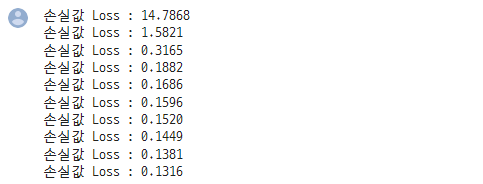

### 성능 검증
 - 검증 데이터를 이용해 평가지표인 ROC AUC 값 구해보자
 - 실제값을 얼마나 잘 예측하나 확인

In [81]:
from sklearn.metrics import roc_auc_score # 사이킷런 제공 함수
# 실제값과 예측 확률값을 담을 리스트 초기화 : ROC AUC 계산을 위해
true_list = [] # 실제값
preds_list = [] # 예측값

In [83]:
model.eval() # 모델을 평가 상태로 설정 : 모델에 드롭아웃이나, 배치 정규화 적용이 없어 사실상 없어도 됨

with torch.no_grad(): # 기울기 계산 비활성화 : with문 내 사실 backward()가 없기 때문에 기울기 계산 할일 없음
    try:    # loader_valid를 호출하면 에러발생하여 try문으로 예외무시함
        for images, labels in loader_valid: # error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor' 
            images = images.to(device)
            labels = labels.to(device) # device에 위치한 model의 입력으로 사용하지 않으므로 불필요

            
            # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
            outputs = model(images)

            # 사이킷런 함수인 roc_auc_score는 GPU에 있는 데이터 연산 불가 : .cpu()
            preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # "1"을 예측할 확률 (32, 1)
            true = labels.cpu()

            # 예측 확률과 실제값을 리스트에 추가
            preds_list.extend(preds) # extend() : 배치를 풀어서 리스트에 넣는다
            true_list.extend(true)
    except:
        print('끝')
# 검증 데이터 ROC AUC 점수 계산
print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list, preds_list):.4f}')

끝
검증 데이터 ROC AUC : 0.9924


#### torch.softmax(data, dim=) 작동원리


```
a = torch.Tensor([[0.1], [0.5], [0.7]])
b = torch.Tensor([[0.7], [0.5], [0.1]]).T
```


```
print(a, a.shape) # [3, 1]
print(b, b.shape) # [1, 3]

>> tensor([[0.1000],
        [0.5000],
        [0.7000]]) torch.Size([3, 1])
>> tensor([[0.7000, 0.5000, 0.1000]]) torch.Size([1, 3])
```


```
torch.softmax(a, dim=0) # 2차원인 경우, dim=0는 세로축(row단위) 합이 1

>> tensor([[0.2318],
        [0.3458],
        [0.4224]])
```


```
torch.softmax(b, dim=1) # 2차원인 경우, dim=1는 가로축(col단위) 합이 1

>> tensor([[0.4224, 0.3458, 0.2318]])
```



```
# 배치 차원 추가하는 방법(numpy or torch)
np.expand_dims(a, axis=0).shape # numpy.expand_dims(data, axis=0) → array
torch.unsqueeze(a, dim=0).shape # torch.unsqueeze(data, dim=0) → torch

>> torch.Size([1, 3, 1])
```


```
torch.softmax(torch.unsqueeze(a, dim=0), dim=1) # 3차원(배치 차원 추가되어)인 경우, dim=1은 세로축(row단위) 합이 1

>> tensor([[[0.2318],
         [0.3458],
         [0.4224]]])
```











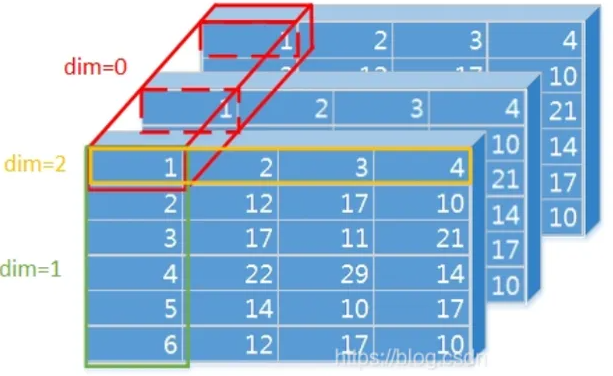

#### torch.no_grad() 메서드의 동작 확인


```
w = torch.tensor(2.0, requires_grad=True) # True나 False로 적용해도 .grad는 (None으로) 생성됨
z = 2 * w # w의 함수인 z또한 requires_grad=True

with torch.no_grad():   # with문 내에서 모든 torch에 "자동미분그래프"를 저장하지 않는다
    epochs = 5
    for epoch in range(epochs):
        y = 2 * w
        print(w.requires_grad)  # with torch.no_grad() 내에서도 requires_grad=True → True
        print(y.requires_grad)  # with torch.no_grad() 적용시 requires_grad=True → False
        y.backward() # 에러 발생
```



#### list.extend() vs list.append()


```
list_a = []
list_b = []

for i in range(3):
    add = [1,2,3]
    list_a.extend(add)  # extend : 리스트를 열어서 요소를 추가
    list_b.append(add)  # append : 리스트 그대로 추가

print(list_a)
print(list_b)

>> [1, 2, 3, 1, 2, 3, 1, 2, 3]
>> [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
```



## 성능 개선
 - 1. 다양한 이미지 변환
 - 2. 더 깊은 CNN 모델
 - 3. 더 뛰어난 옵티마이저
 - 4. 훈련시 에폭 수 증가

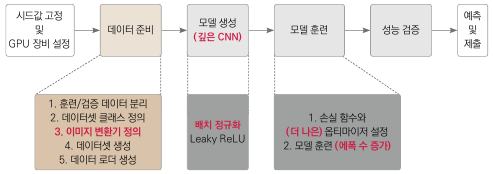

### 데이터 준비
#### 이미지 변환과 데이터 증강
#### 이미지 변환기 정의
 - 훈련 데이터용 : 다양한 변환 적용
 - 검증 및 테스트 데이터용 : 최소한의 변환 적용

In [85]:
from torchvision import transforms # 이미지 변환을 위한 모듈

# 훈련 데이터용 변환기
# ImageDataset(Dataset) 클래스의 __getitem__(self, transform=None)메서드에 의해 cv2.imread()로 읽어온 img에 적용하게됨
transform_train = transforms.Compose([transforms.ToTensor(),    # cv2이미지 → Tensor
                                      transforms.Pad(32, padding_mode='symmetric'),    # 대칭 패딩
                                      transforms.RandomHorizontalFlip(),                # 받아온 이미지중 50%만 무작위로  좌우대칭
                                      transforms.RandomVerticalFlip(),                  # 받아온 이미지중 50%만 무작위로  상하대칭
                                      transforms.RandomRotation(10),                    # 받아온 이미지를 -10~+10도 무작위로 회전
                                      transforms.Normalize((0.485, 0.456, 0.406),       # RGB 3가지 각각 평균과 분산 : 백만개 이상의 이미지 보유한 이미지넷의 데이터로 부터 얻은 평균과 분산임
                                                            (0.229, 0.224, 0.225))])
# 검증 및 테스트 데이터용 변환기
transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.Pad(32, padding_mode='symmetric'),
                                     transforms.Normalize((0.485, 0.456, 0.406),
                                                          (0.229, 0.224, 0.225))])

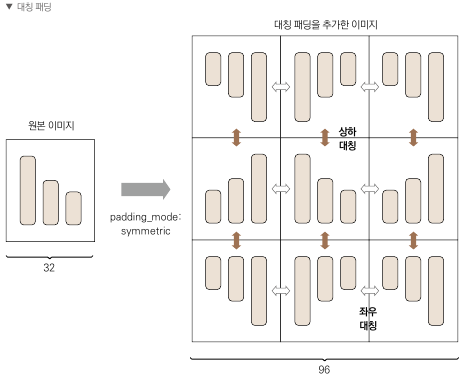

#### 데이터셋 및 데이터 로더 생성

In [ ]:
dataset_train = ImageDataset(df=train, img_dir='train/', transform=transform_train)